### Задача предсказания цены бриллианта в завимимости от его характеристик

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler # (x_i - mean(x))/var (x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV


In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 11)

In [7]:
data.isna().sum() # нет пропусков

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [10]:
data.describe() # столбец unnamed надо выкинуть, так как он просто нумерует строки 

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Рассмотрим колонки, содержащие категориальные признаки.

In [14]:
data['cut'].unique(), data['cut'].nunique()

(array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object), 5)

In [15]:
data['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Рассмотрим корреляцию числовых признаков:

In [16]:
data_corr = data.drop(['cut', 'color', 'clarity'], axis=1)

<Axes: >

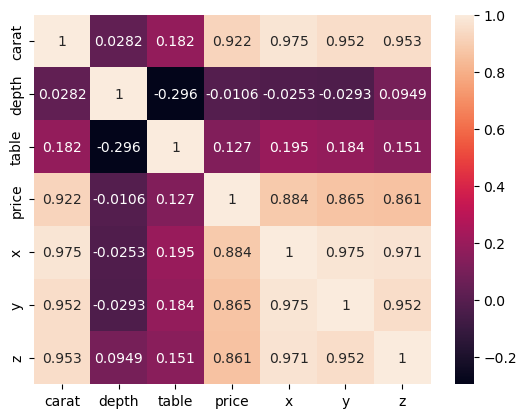

In [17]:
sns.heatmap(data_corr.corr(), annot=True, fmt='.3g')

Закодируем все категориальные признаки

In [18]:
ohe = OneHotEncoder(sparse=True, drop='first')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [20]:
X_object = data.select_dtypes('object')
ohe.fit(X_object) #проходим по колонкам и строим диаграмму соответствий

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', sparse=True)

In [21]:
codes = ohe.transform(X_object).toarray() # применяем нашу диаграмму соответствий к массиву данных

In [22]:
codes

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
feature_names = ohe.get_feature_names_out(['cut', 'color', 'clarity'])
feature_names

array(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], dtype=object)

In [25]:
data_coded = pd.concat([data.select_dtypes(exclude= 'object'), pd.DataFrame(codes, columns=feature_names).astype(int)], axis=1)

In [26]:
data_coded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


Разбиение на train и test. Масштабирование вещественных признаков

In [27]:
X = data_coded.drop('price', axis=1)
y = data['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
scaler = StandardScaler()
scaler.fit(X_train) # mean, var считается
X_train = scaler.transform(X_train) # применяется к train
X_test = scaler.transform(X_test) # применяется к test, берем mean, var из X_train чтобы полученные данные были из того же распределения, что и X_train


In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [33]:
print('MSE_train: ', mean_squared_error(y_train, lin_reg.predict(X_train)) ** 0.5)
print('MSE_test: ', mean_squared_error(y_test, lin_reg.predict(X_test)) ** 0.5)

MSE_train:  1128.3411879347514
MSE_test:  1134.05795711174


В данном случае удобнее использовать MAPE как метрику качества

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

print('MSE_train: ', mean_absolute_percentage_error(y_train, lin_reg.predict(X_train)))
print('MSE_test: ', mean_absolute_percentage_error(y_test, lin_reg.predict(X_test)))

MSE_train:  0.39022699052941506
MSE_test:  0.38947118905484585


MAPE 0.4 - много. Наша выборка линейно плохо аппроксимируется

In [35]:
coef_data = pd.DataFrame(lin_reg.coef_, index=X.columns, columns= ['coef'])
coef_data.sort_values(by=['coef'])

,coef
x,-1167.527172
color_J,-526.022735
color_I,-446.806285
color_H,-353.725071
color_G,-203.408794
color_F,-103.296508
depth,-100.784217
color_E,-82.797684
table,-65.797044
z,-40.888909


In [40]:
lasso = linear_model.Lasso(alpha=0.5) # лин модель с Л1 регуляризацией
lasso.fit(X_train, y_train)
print('Lasso_train: ', mean_squared_error(y_train, lasso.predict(X_train)) ** 0.5)
print('Lasso_test: ', mean_squared_error(y_test, lasso.predict(X_test)) ** 0.5)

Lasso_train:  1128.4086875393198
Lasso_test:  1134.0873606590296


In [44]:
ridge = linear_model.Ridge(alpha=5) # лин модель с Л2 регуляризацией
ridge.fit(X_train, y_train)
print('ridge_train: ', mean_squared_error(y_train, ridge.predict(X_train)) ** 0.5)
print('ridge_test: ', mean_squared_error(y_test, ridge.predict(X_test)) ** 0.5)

ridge_train:  1128.3556827434122
ridge_test:  1133.999056350317


✅ В зависимости от значения параметра  𝛼 в Lasso-регрессии зануляются разные оценки коэффициентов. Подберем оптимальное значение коэффициента регуляризации по тренировочной выборке.

In [45]:
alfas = [0.01, 0.1, 1, 10, 100]
lasso_euclid = []
ridge_euclid = []

In [46]:
print("Lasso Euclidean norms:")
print()
for i in alfas:
    lasso = linear_model.Lasso(alpha = i)
    lasso.fit(X_train, y_train)
    lasso_euclid.append(np.linalg.norm(lasso.coef_))
    
print(lasso_euclid)

print('----------')
print("Ridge Euclidean norms:")
print()

for i in alfas:
    ridge = linear_model.Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    ridge_euclid.append(np.linalg.norm(ridge.coef_))
    
print(ridge_euclid)

Lasso Euclidean norms:

[6707.895681312844, 6695.526272938268, 6572.87372243306, 5443.876256183845, 3864.032252946048]
----------
Ridge Euclidean norms:

[6709.196896273618, 6708.524111717392, 6701.807878105078, 6635.785784219356, 6071.889189137405]


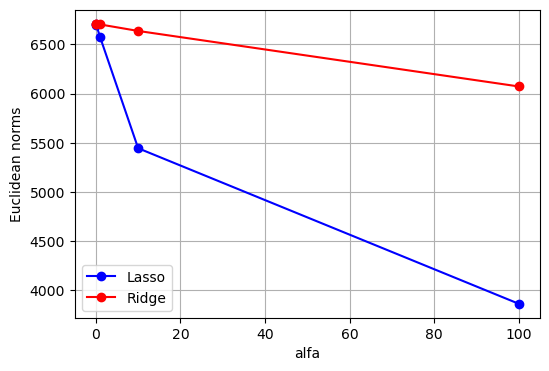

In [47]:
x = alfas
fig, ax = plt.subplots(figsize=(6,4))
y1 = lasso_euclid
y2 = ridge_euclid

#Lasso
ax.plot(x, y1, color = 'blue', marker = 'o', label = 'Lasso')

#Ridge
ax.plot(x, y2, color = 'red', marker = 'o', label = 'Ridge')

ax.grid(True)
plt.xlabel('alfa')
plt.ylabel('Euclidean norms')
leg = ax.legend(loc='lower left', frameon = True)

Кросс - валидация

In [48]:
reg = LassoCV(cv = 5, n_alphas = 50, random_state = 0).fit(X_train, y_train)

reg_alph = reg.alphas_
array = reg.mse_path_

a=[]
for i in range(len(array)):
    m = np.mean(array[i])
    a.append(m)
    
d1 = {"MSE_1": pd.Series(a), "alpha_1": pd.Series(reg_alph)}
df1 = pd.DataFrame(d1)
print(df1)

           MSE_1      alpha_1
0   1.582613e+07  3667.681935
1   1.254994e+07  3185.423475
2   1.005673e+07  2766.576519
3   8.176083e+06  2402.803173
4   6.757486e+06  2086.861884
5   5.687423e+06  1812.463282
6   4.880263e+06  1574.144975
7   4.271414e+06  1367.162815
8   3.812152e+06  1187.396454
9   3.465726e+06  1031.267326
10  3.204414e+06   895.667402
11  3.007303e+06   777.897326
12  2.858621e+06   675.612675
13  2.746469e+06   586.777292
14  2.661871e+06   509.622752
15  2.598058e+06   442.613157
16  2.549924e+06   384.414561
17  2.462517e+06   333.868418
18  2.387722e+06   289.968519
19  2.300856e+06   251.840956
20  2.215885e+06   218.726735
21  2.124417e+06   189.966657
22  2.032799e+06   164.988202
23  1.948502e+06   143.294130
24  1.874454e+06   124.452582
25  1.812288e+06   108.088483
26  1.764851e+06    93.876077
27  1.727341e+06    81.532440
28  1.664043e+06    70.811852
29  1.635021e+06    61.500899
30  1.614393e+06    53.414230
31  1.595666e+06    46.390866
32  1.5807

In [49]:
reg = LassoCV(cv = 5, alphas = alfas, random_state = 0).fit(X_train, y_train)

reg_alph = reg.alphas_
array = reg.mse_path_

a=[]
for i in range(len(array)):
    m = np.mean(array[i])
    a.append(m)
    
d2 = {"MSE_2": pd.Series(a), "alpha_2": pd.Series(reg_alph)}
print(np.argmin(d2["MSE_2"]))
df2 = pd.DataFrame(d2)
print(df2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850363624.6229858, tolerance: 48194802.49143246
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3429394187.125679, tolerance: 48194802.49143246
  model = cd_fast.enet_coordinate_descent_gram(


2
          MSE_2  alpha_2
0  1.784715e+06   100.00
1  1.339959e+06    10.00
2  1.281700e+06     1.00
3  1.285474e+06     0.10
4  1.287612e+06     0.01
